In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.compose import make_column_selector
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
hr = pd.read_csv('HR_comma_sep.csv')

In [3]:
X = hr.drop('left',axis=1)
y = hr['left']

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)

In [11]:

ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore').set_output(transform='pandas')
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude=object)  ),
                             (ohe,make_column_selector(dtype_include=object)  ),
                             verbose_feature_names_out=False).set_output(transform='pandas')

# scaler_mm = MinMaxScaler()
# scaler_std = StandardScaler()

In [63]:
dtc = DecisionTreeClassifier(random_state=24)
pipe  = Pipeline([('CT',ct),('DT',dtc)])
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
params = {'DT__min_samples_split':[2,10,25,50], 'DT__min_samples_leaf':[1,10,25,50],'DT__max_depth':[None,4,6]}
gcv = GridSearchCV(pipe,param_grid=params,cv=kfold,scoring='roc_auc',verbose=3)
gcv.fit(X,y)
# pipe.fit(X_train, y_train
# plt.figure(figsize=(35,20))
# plot_tree(dtc, feature_names=list(X.columns), class_names=['0','1'], filled= True, fontsize=20)
# plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.976 total time=   0.0s
[CV 2/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.972 total time=   0.0s
[CV 3/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.972 total time=   0.0s
[CV 4/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.978 total time=   0.0s
[CV 5/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.976 total time=   0.0s
[CV 1/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.984 total time=   0.0s
[CV 2/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.979 total time=   0.0s
[CV 3/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.979 total time=   0.0s
[CV 4/5] END DT__max_de

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000020A1DBF8AD0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000020A1DBF93A0>)],
                                                          verbose_feature_names_out=False)),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=24))]),
             param_grid={'DT__max_depth': [None, 4, 6],
                         'DT__min_samples_leaf': [1, 10, 25, 50],
                         'DT__min_samples_split': [2, 10, 25, 50]},
             scoring='roc_auc', verbose=3)

In [13]:
print(gcv.best_params_)
print(gcv.best_score_)

{'DT__max_depth': None, 'DT__min_samples_leaf': 10, 'DT__min_samples_split': 2}
0.9859959505714124


In [64]:
gcv.best_estimator_

Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020A1E8FFC80>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000020A1E8FEAE0>)],
                                   verbose_feature_names_out=False)),
                ('DT',
                 DecisionTreeClassifier(min_samples_leaf=10, random_state=24))])

In [49]:
best_tree= gcv.best_estimator_.named_steps['DT']
best_tree


DecisionTreeClassifier(min_samples_leaf=10, random_state=24)

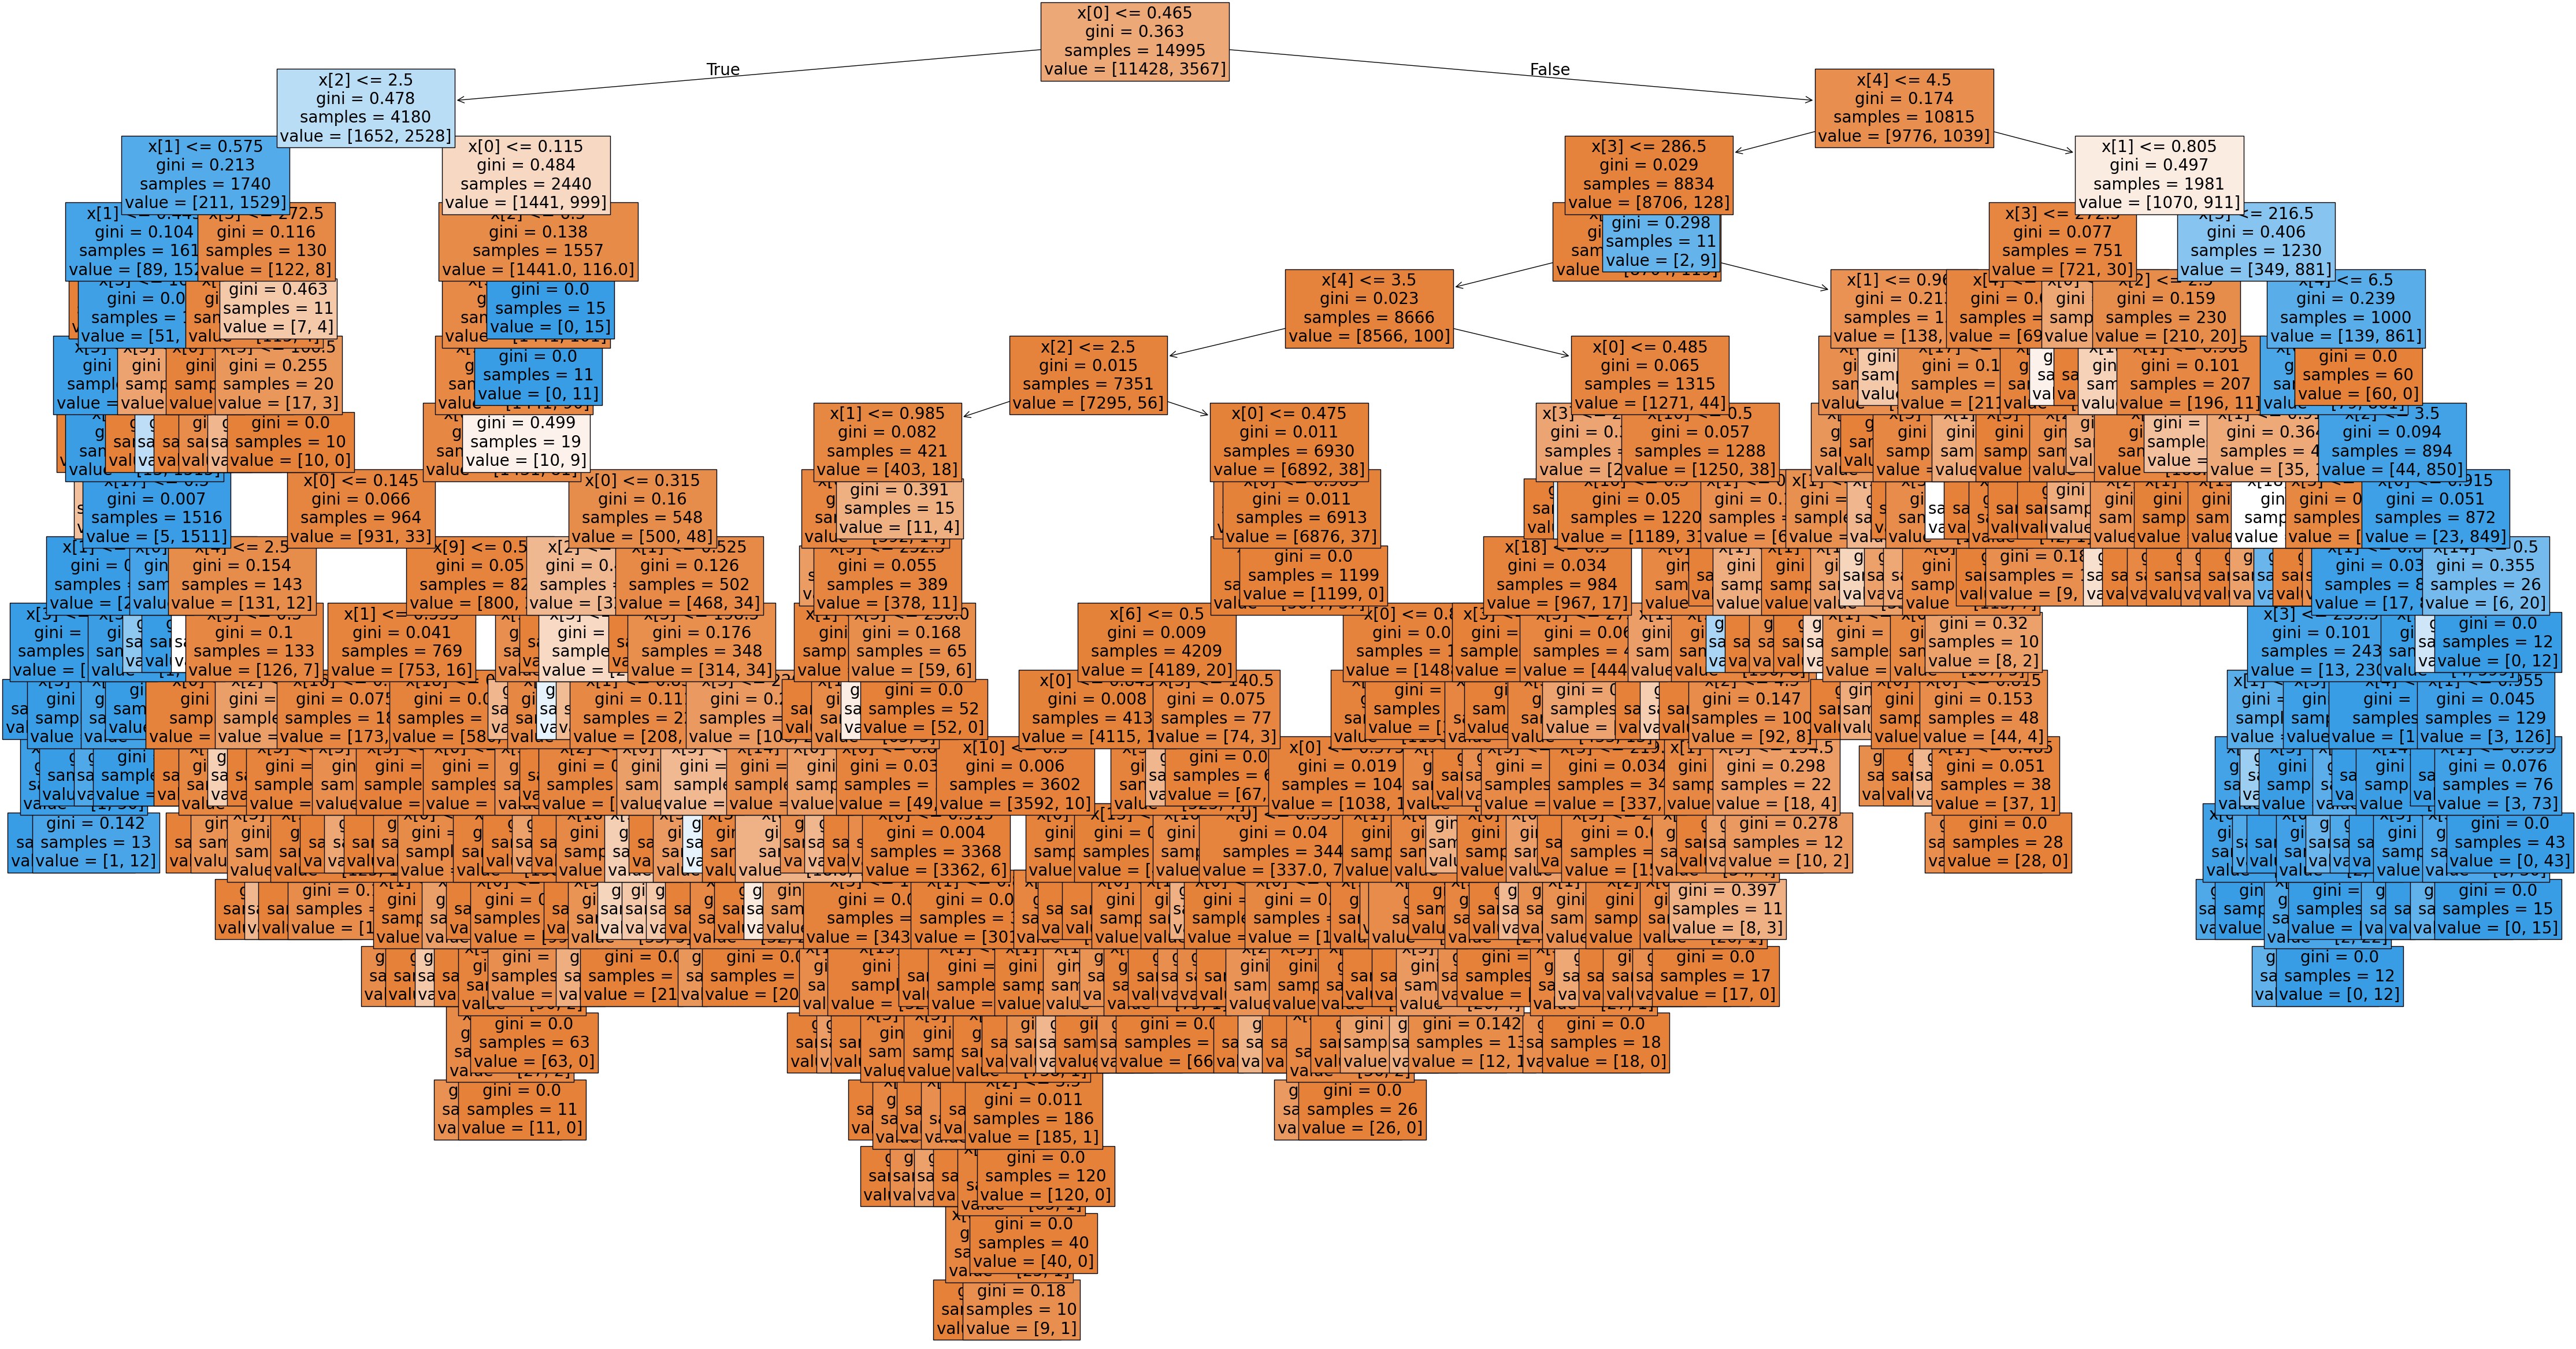

In [50]:
plt.figure(figsize=(55,30))
plot_tree(best_tree,filled= True, fontsize=20)
plt.show()

In [52]:
best_tree.feature_importances_


array([5.20970813e-01, 1.45602793e-01, 1.06079455e-01, 7.34661254e-02,
       1.48698815e-01, 2.85011419e-04, 3.65999798e-05, 0.00000000e+00,
       8.83493499e-05, 1.10257499e-04, 1.74835740e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.97893379e-04, 1.22494686e-04,
       8.05381965e-04, 3.96940288e-04, 1.56552021e-03, 5.98715372e-04])

In [56]:
gcv.best_estimator_.named_steps['CT'].get_feature_names_out()

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_support', 'Department_technical',
       'salary_high', 'salary_low', 'salary_medium'], dtype=object)

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020A1DBCD880>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020A1DC3D520>)],
                  verbose_feature_names_out=False)>

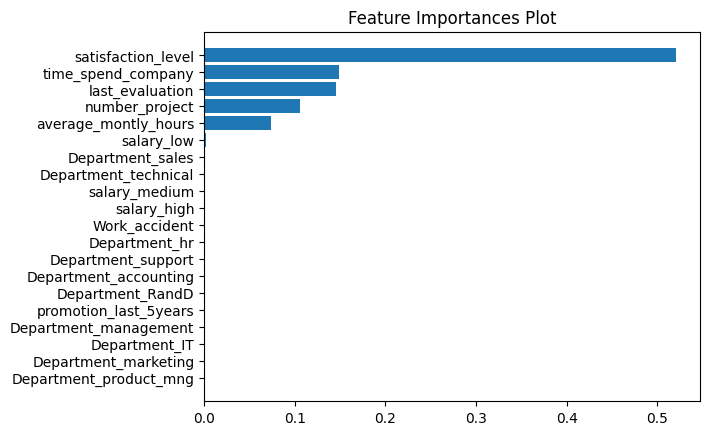

In [55]:
df_imp= pd.DataFrame({'feature': list(gcv.best_estimator_.named_steps['CT'].get_feature_names_out()),
               'importance':best_tree.feature_importances_})
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot")
plt.show()

In [57]:
df_imp

,feature,importance
13,Department_product_mng,0.000000
12,Department_marketing,0.000000
7,Department_IT,0.000000
11,Department_management,0.000000
6,promotion_last_5years,0.000037
8,Department_RandD,0.000088
9,Department_accounting,0.000110
15,Department_support,0.000122
10,Department_hr,0.000175
5,Work_accident,0.000285
